# Homework 6

TFCB 2024

Due date: Nov 14, 2024

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [6]:
library(tidyverse)
library(ggplot2)
library(dplyr)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
1. `colnames()`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


In [7]:
# ! = negates a logical statement will say FALSE if the statement if TRUE (https://www.w3schools.com/r/r_operators.asp)
# colnames() = returns the names of the columns in a data frame (https://www.codecademy.com/resources/docs/r/data-frames/colnames)
# is.na = checks for missing values in a dataset (https://www.educative.io/answers/what-is-isna-function-in-r)
# is.numeric = function that checks if the argument is a numeric value or not returning a TRUE statement if the argument is a number and FALSE if its not (https://www.educative.io/answers/what-is-the-isnumeric-function-in-r)
# anti_join = identifies observations in one dataset that are absent in a second dataset (https://www.geeksforgeeks.org/anti-join-in-r/)
# desc = arranges data in descending order (https://www.rdocumentation.org/packages/dplyr/versions/1.0.10/topics/desc)
# dplyr::slice = slice() from dplyr allows the selectin of specifc rows, takes part of the data from the dataframe and displays it separate (https://www.geeksforgeeks.org/slice-from-dplyr-in-r/)
# dplyr::across = if you transform your data you can apply it to all of the columns in your data (https://www.statology.org/dplyr-across/)

## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [8]:
#Load biomaRt package 
library(biomaRt)
#Connect to ensemble hsapiens gene ensembl dataset
mart <- useMart('ensembl', dataset = 'hsapiens_gene_ensembl')
#mart <- useDataset(“hsapiens_gene_ensembl”, mart)
#Retrieve gene annotations
annotations <- getBM(
  mart = mart,
  attributes = c('ensembl_gene_id', 'hgnc_symbol', 'ccds'),
  uniqueRows = TRUE) %>%
  #Rename ccds to ccds_id
  rename(ccds_id = `ccds`) %>%
  #Filter empty column ccds_id
  filter(ccds_id != '') %>%
  #Print
  print()

      ensembl_gene_id     hgnc_symbol   ccds_id
1     ENSG00000169789             PRY CCDS14799
2     ENSG00000114374           USP9Y CCDS14781
3     ENSG00000169807            PRY2 CCDS35482
4     ENSG00000198692          EIF1AY CCDS14795
5     ENSG00000198692          EIF1AY CCDS65368
6     ENSG00000183753            BPY2 CCDS14800
7     ENSG00000244395          RBMY1D CCDS35480
8     ENSG00000244395          RBMY1D CCDS83521
9     ENSG00000169953           HSFY2 CCDS35476
10    ENSG00000169953           HSFY2 CCDS14791
11    ENSG00000012817           KDM5D CCDS14794
12    ENSG00000012817           KDM5D CCDS55555
13    ENSG00000012817           KDM5D CCDS55554
14    ENSG00000172468           HSFY1 CCDS35475
15    ENSG00000172468           HSFY1 CCDS14790
16    ENSG00000176679         TGIF2LY CCDS14775
17    ENSG00000169800          RBMY1F CCDS35483
18    ENSG00000169800          RBMY1F CCDS94717
19    ENSG00000182415           CDY2A CCDS14789
20    ENSG00000185894           BPY2C CC

In [9]:
#Open and read tsv file 
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
#Rename ENSEMBL gene to ensembl_gene_id
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  #Print
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_bin2d).”


geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

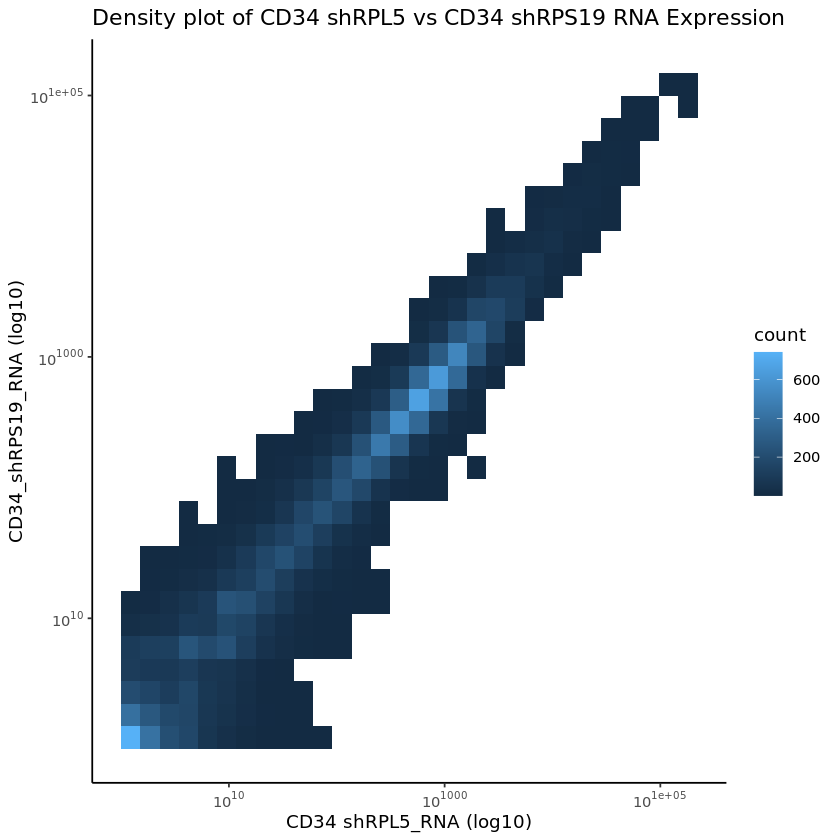

In [10]:
#Recall data 
data %>%
  dplyr::select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  #Use 2d bins to to show density of overlapping pts
  geom_bin2d() + 
  #Convert both axes to log10
  scale_x_log10(labels = scales::math_format(10^.x)) +
  scale_y_log10(labels = scales::math_format(10^.x)) +
  #Add labels and title
  labs(x = "CD34 shRPL5_RNA (log10)", 
    y = "CD34_shRPS19_RNA (log10)",
    title = "Density plot of CD34 shRPL5 vs CD34 shRPS19 RNA Expression") + 
    theme_classic()
geom_point()

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [11]:
#Select columns that match RPL5, RPS19 and luc from ensemble_gene_id
data <- data %>% 
    dplyr::select(ensembl_gene_id, matches("RPL5|RPS19|Luc"))
#First few rows of data
head(data)


ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,40,49,6,3,20,25,0,2,84,86,22,12
ENSG00000000005,0,0,0,0,1,0,0,0,3,0,0,0
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000000457,149,126,14,22,185,225,40,20,153,128,14,17
ENSG00000000460,289,268,52,106,152,237,77,40,364,425,143,57
ENSG00000000938,204,145,17,13,412,403,31,30,8,8,0,0


In [12]:
print(data)

# A tibble: 63,677 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# … with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [13]:
#Select rows with 50 counts or more using filter
data <- data %>%
    filter(across(matches("RPL5|RPS19|Luc"), ~ . >=50))
#Look at first few rows 
head(data)

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000001036,1487,936,182,295,800,752,148,136,913,854,189,183
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,1656,220,174
ENSG00000001497,1436,1231,253,367,885,1016,195,137,1647,2118,594,392
ENSG00000002549,1228,1186,285,447,693,897,260,229,1537,1668,459,272
ENSG00000002586,2746,1600,260,395,2570,1989,379,258,819,811,166,112


## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [14]:
data <- data %>%
    mutate(across(matches("RPL5|RPS19|Luc"), ~. / median(.,)))
head(data)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8169839,0.8319468,0.6196319,0.8956835,0.6748047,0.5968170,1.0495050,0.8471338,0.7692308,0.8198504,0.8661417,0.8571429
ENSG00000001036,1.0885798,0.7787022,1.1165644,1.0611511,0.7812500,0.6648983,0.7326733,0.8662420,0.6818521,0.5805574,0.7440945,1.0892857
ENSG00000001084,0.7584187,1.0183028,0.8220859,0.9892086,0.5449219,0.7223696,0.8366337,0.6050955,1.1045556,1.1257648,0.8661417,1.0357143
ENSG00000001497,1.0512445,1.0241265,1.5521472,1.3201439,0.8642578,0.8983201,0.9653465,0.8726115,1.2300224,1.4398368,2.3385827,2.3333333
ENSG00000002549,0.8989751,0.9866889,1.7484663,1.6079137,0.6767578,0.7931034,1.2871287,1.4585987,1.1478715,1.1339225,1.8070866,1.6190476
ENSG00000002586,2.0102489,1.3311148,1.5950920,1.4208633,2.5097656,1.7586207,1.8762376,1.6433121,0.6116505,0.5513256,0.6535433,0.6666667


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [15]:
lfc <- data %>%
#mean for rpl15
  mutate(mean_rpl5_te = (CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)) %>%
#mean for rps19
  mutate(mean_rps19_te = (CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2)) %>%
##mean for shluc 
  mutate(mean_shluc_te = (CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2)) %>%
#select the ensembl gene id column, mean rpl5, rps19 and shluc 
  dplyr::select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
#get log fold change for rpl15 and rps19 
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  print()
  head(lfc)

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


ensembl_gene_id,mean_rpl5_te,mean_rps19_te,mean_shluc_te,lfc_te_rpl5,lfc_te_rps19
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.9189685,1.4915118,1.0844534,-0.2388808,0.4598073
ENSG00000001036,1.1662489,1.1056371,1.4522864,-0.3164503,-0.3934480
ENSG00000001084,1.0194588,1.1376461,0.8527277,0.2576465,0.4158948
ENSG00000001497,1.3839893,1.0427670,1.7498735,-0.3384179,-0.7468339
ENSG00000002549,1.7799459,1.8680181,1.5015090,0.2454203,0.3150953
ENSG00000002586,0.9026121,0.8245621,1.1351996,-0.3307679,-0.4612458


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [35]:
#new data frame mean_lfc from lfc 
mean_lfc <- lfc %>% 
#new column avg_lfc
    mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19) / 2) %>%
    dplyr::select(ensembl_gene_id, avg_lfc)
#head
head(mean_lfc)
#print
print(mean_lfc)

ensembl_gene_id,avg_lfc
<chr>,<dbl>
ENSG00000000419,0.1104632
ENSG00000001036,-0.3549491
ENSG00000001084,0.3367707
ENSG00000001497,-0.5426259
ENSG00000002549,0.2802578
ENSG00000002586,-0.3960069


# A tibble: 4,239 × 2
   ensembl_gene_id avg_lfc
   <chr>             <dbl>
 1 ENSG00000000419   0.110
 2 ENSG00000001036  -0.355
 3 ENSG00000001084   0.337
 4 ENSG00000001497  -0.543
 5 ENSG00000002549   0.280
 6 ENSG00000002586  -0.396
 7 ENSG00000002834  -0.256
 8 ENSG00000003056   0.880
 9 ENSG00000003393   1.11 
10 ENSG00000003402   0.431
# … with 4,229 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [36]:
#join mean_lfc with annotations 
mean_lfc <- mean_lfc %>%
    left_join(annotations, by = "ensembl_gene_id")

print(mean_lfc)


# A tibble: 8,849 × 4
   ensembl_gene_id avg_lfc hgnc_symbol ccds_id  
   <chr>             <dbl> <chr>       <chr>    
 1 ENSG00000000419   0.110 DPM1        CCDS82628
 2 ENSG00000000419   0.110 DPM1        CCDS13434
 3 ENSG00000000419   0.110 DPM1        CCDS93059
 4 ENSG00000001036  -0.355 FUCA2       CCDS5200 
 5 ENSG00000001084   0.337 GCLC        CCDS4952 
 6 ENSG00000001084   0.337 GCLC        CCDS75471
 7 ENSG00000001497  -0.543 LAS1L       CCDS55434
 8 ENSG00000001497  -0.543 LAS1L       CCDS14381
 9 ENSG00000001497  -0.543 LAS1L       CCDS55433
10 ENSG00000001497  -0.543 LAS1L       CCDS94622
# … with 8,839 more rows


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

In [43]:
colnames(mean_lfc)
colnames(data)

[1] "ensembl_gene_id" "avg_lfc"         "hgnc_symbol"     "ccds_id"

[1] "ensembl_gene_id"    "CD34_shRPL5_RNA_1"  "CD34_shRPL5_RNA_2" 
 [4] "CD34_shRPL5_RPF_1"  "CD34_shRPL5_RPF_2"  "CD34_shRPS19_RNA_1"
 [7] "CD34_shRPS19_RNA_2" "CD34_shRPS19_RPF_1" "CD34_shRPS19_RPF_2"
[10] "CD34_shLuc_RNA_1"   "CD34_shLuc_RNA_2"   "CD34_shLuc_RPF_1"  
[13] "CD34_shLuc_RPF_2"

In [45]:
#Bottom 10 genes
mean_lfc %>%
    arrange(avg_lfc) %>% #sorts in ascending order 
    slice_head(n=10) %>% #select first 10 rows
    dplyr::select(ensembl_gene_id, hgnc_symbol, avg_lfc)

ensembl_gene_id,hgnc_symbol,avg_lfc
<chr>,<chr>,<dbl>
ENSG00000180573,H2AC6,-2.950092
ENSG00000197903,H2BC12,-2.794987
ENSG00000115268,RPS15,-2.273704
ENSG00000115268,RPS15,-2.273704
ENSG00000176340,COX8A,-2.019816
ENSG00000105640,RPL18A,-2.013365
ENSG00000137818,RPLP1,-2.009359
ENSG00000137818,RPLP1,-2.009359
ENSG00000188486,H2AX,-1.861849


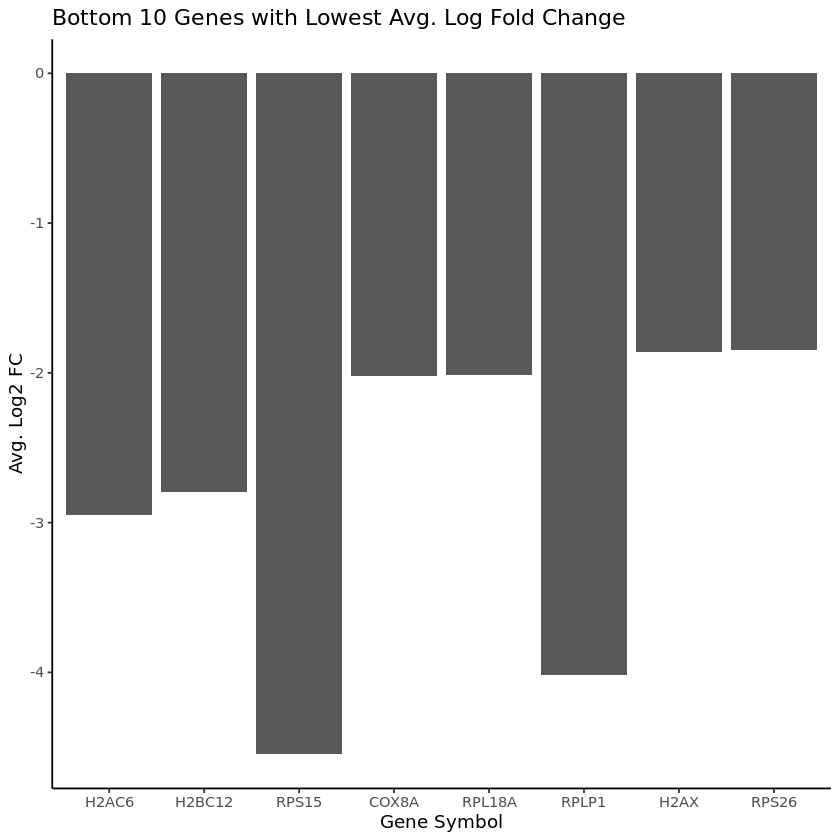

: 

In [ ]:
# Plot
ggplot(bottom_10_genes, aes(x = reorder(hgnc_symbol, avg_lfc), y = avg_lfc)) + #reorder shows the avg_lfc value for each gene symbol 
    geom_bar(stat = "identity") + # identity makes the height of the bars the values in avg_lfc
    labs(title = "Bottom 10 Genes with Lowest Avg. Log Fold Change",
    x = "Gene Symbol", 
    y = "Avg. Log2 FC") +
    theme_classic()
##Explanation: 
# It appears that in the experiment they performed they knockdown 3 genes RPL5, RPS19 and they used Luc as a control. The graph depicts the bottom 10 genes with a decrease in fold change. The fold changes are negative indicating a decrease in expression, that is why I decided to start my graph at zero to -4 log2 fc. 